In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
results1 = pd.read_csv('participant_classification/participant_id_test_1.csv')
results2 = pd.read_csv('participant_classification/participant_id_test_2.csv')
results3 = pd.read_csv('participant_classification/participant_id_test_3.csv')

In [8]:
results = pd.concat([results1,results2,results3])
results

,model,eeg_feature,remove_global_connections,remove_baseline_signal_noise_removal,number_test_targets,batch_size,hidden_channels,learning_rate,dropout_rate,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params
0,MLP,wav,False,False,10,4,16,0.0001,0.0,2.720322,0.796875,0.796875,0.796875,0.796875,-1,121180
1,MLP,wav,False,False,10,16,16,0.0001,0.0,2.703681,0.815625,0.815625,0.815625,0.815625,-1,121180
2,MLP,wav,False,False,10,4,16,0.0001,0.4,2.815027,0.790625,0.790625,0.790625,0.790625,-1,121180
3,MLP,wav,False,False,10,16,16,0.0001,0.4,2.728878,0.931250,0.931250,0.931250,0.931250,-1,121180
4,MLP,wav,False,False,10,4,16,0.0045,0.0,3.300697,0.184375,0.184375,0.184375,0.184375,-1,121180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,GatedGraphConvGRU,psd,False,False,34,16,128,0.0045,0.4,3.375624,0.169118,0.169118,0.169118,0.169118,-1,846752
644,GatedGraphConvGRU,psd,False,False,34,4,128,0.0090,0.0,3.465442,0.029412,0.029412,0.029412,0.029412,-1,846752
645,GatedGraphConvGRU,psd,False,False,34,16,128,0.0090,0.0,3.430411,0.122243,0.122243,0.122243,0.122243,-1,846752
646,GatedGraphConvGRU,psd,False,False,34,4,128,0.0090,0.4,3.465370,0.033088,0.033088,0.033088,0.033088,-1,846752


In [36]:
del results["remove_global_connections"]
del results["remove_baseline_signal_noise_removal"]

In [9]:
models = ['MLP','GCNMLP','GatedGraphConvMLP','CNN','GCNCNN','GatedGraphConvCNN','GRU','GCNGRU', 'GatedGraphConvGRU']

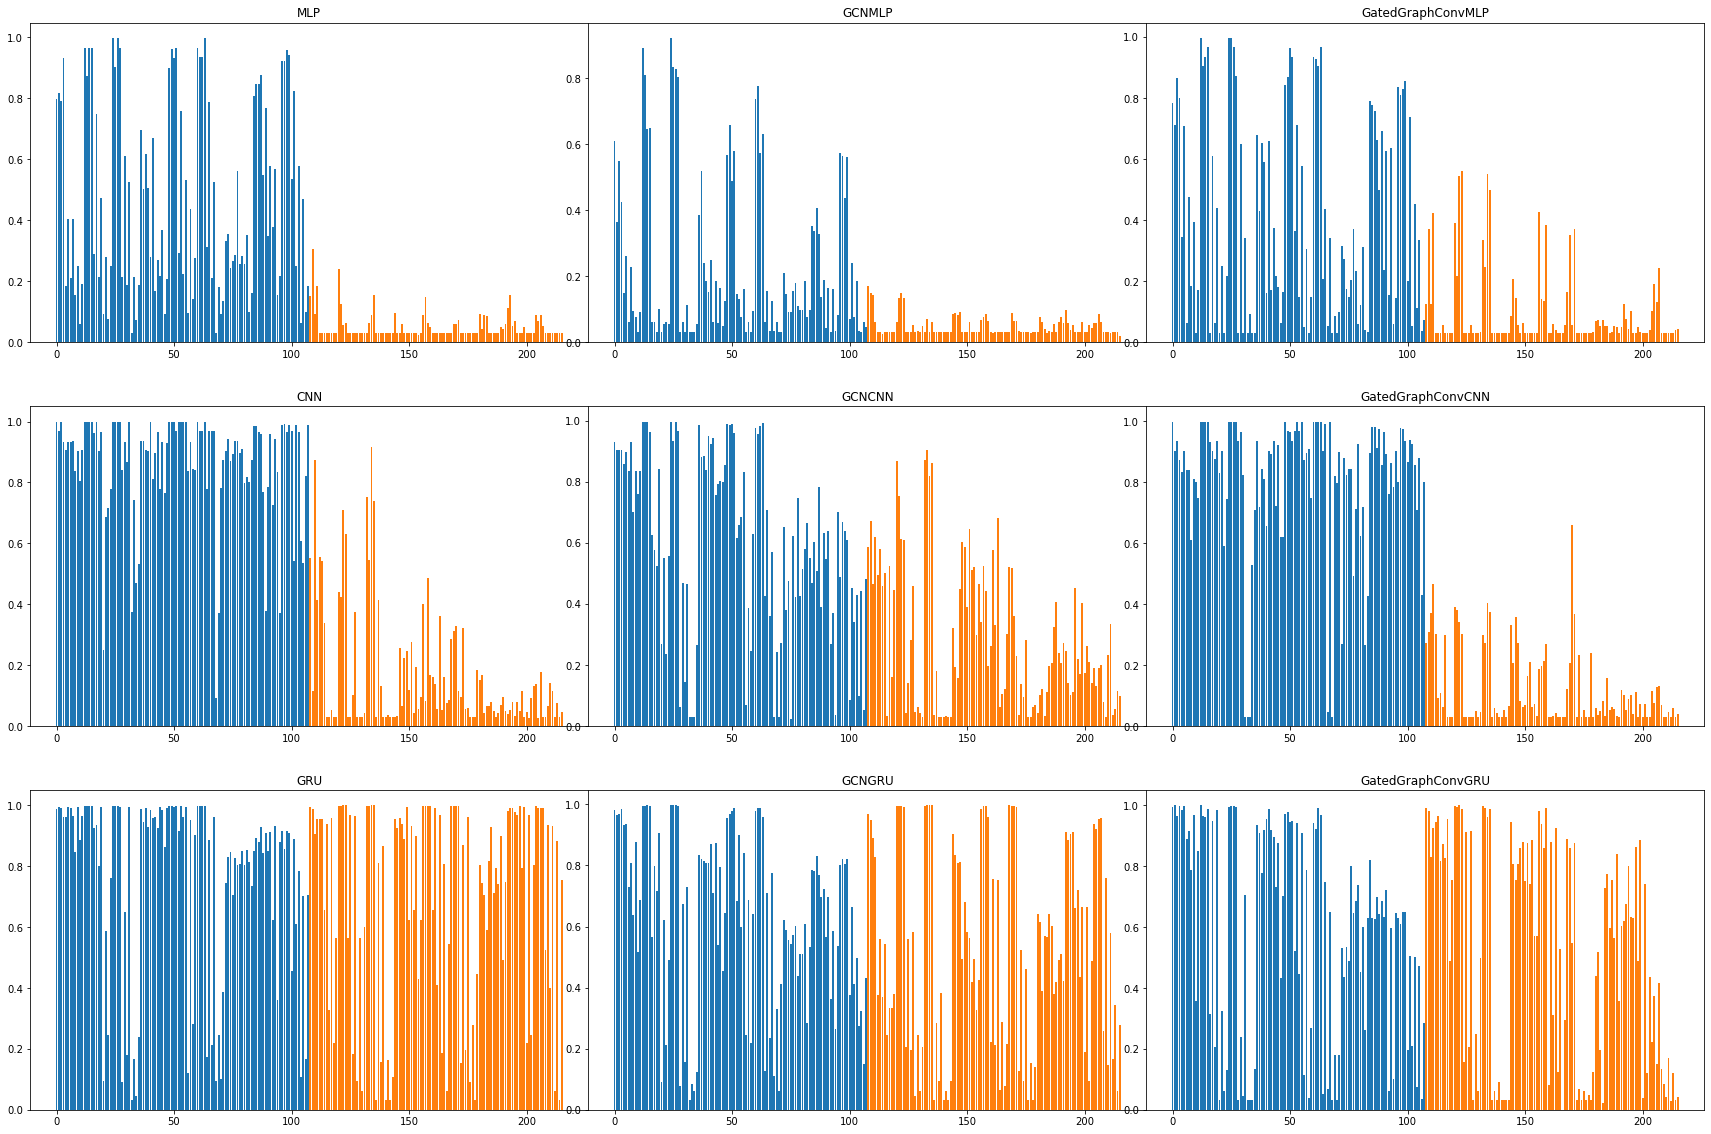

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30,20), gridspec_kw = {'wspace':0, 'hspace':0.2})
for i, model_name in enumerate(models):
    wav_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'wav')]
    wav_results_acc = wav_results.test_acc.to_numpy()

    psd_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'psd')]
    psd_results_acc = psd_results.test_acc.to_numpy()
    
    index = np.unravel_index(i, (3,3))
    ax = axes[index[0]][index[1]]
    ax.title.set_text(f'{model_name}')
    ax.bar(np.arange(0,len(wav_results_acc)), wav_results_acc)
    ax.bar(np.arange(len(psd_results_acc), 2* len(psd_results_acc)), psd_results_acc)
plt.savefig('a.png')
    
# print(model_name)
# print(stats.ttest_ind(wav_results_acc,psd_results_acc))

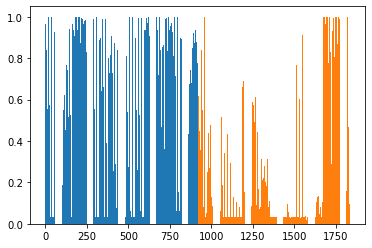

Ttest_indResult(statistic=25.28747072915297, pvalue=2.757205732641998e-121)


In [15]:
wav_results = results[results["eeg_feature"] == 'wav']
wav_results_acc = wav_results.test_acc.to_numpy()

psd_results = results[results["eeg_feature"] == 'psd']
psd_results_acc = psd_results.test_acc.to_numpy()

plt.bar(np.arange(0,len(wav_results_acc)), wav_results_acc)
plt.bar(np.arange(len(psd_results_acc), 2* len(psd_results_acc)), psd_results_acc)
plt.show()

print(stats.ttest_ind(wav_results_acc,psd_results_acc))

In [21]:
for model_name in models:
    print(model_name)
    
    model_results = results[results["model"] == model_name]
    model_results_acc = model_results.test_acc.to_numpy()
    
    wav_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'wav')]
    wav_results_acc = wav_results.test_acc.to_numpy()

    psd_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'psd')]
    psd_results_acc = psd_results.test_acc.to_numpy()
    
    print(f'Mean test accuracy (Overall): {model_results_acc.mean()}')    
    print(f'Mean test accuracy (WE): {wav_results_acc.mean()}')   
    print(f'Mean test accuracy (PSD): {psd_results_acc.mean()}')   
    print(f'Max test accuracy (Overall): {model_results_acc.max()}')    
    print(f'Max test accuracy (WE): {wav_results_acc.max()}')   
    print(f'Max test accuracy (PSD): {psd_results_acc.max()}')   
    
    
    
#     plt.bar(np.arange(0,len(wav_results_acc)), wav_results_acc)
#     plt.bar(np.arange(len(psd_results_acc), 2* len(psd_results_acc)), psd_results_acc)
#     plt.show()
    
    print(stats.ttest_ind(wav_results_acc,psd_results_acc))
    print()
    
#     print(stats.ttest_ind(wav_results_acc,psd_results_acc))

MLP
Mean test accuracy (Overall): 0.26545082153231664
Mean test accuracy (WE): 0.47825492465504726
Mean test accuracy (PSD): 0.05264671840958604
Max test accuracy (Overall): 0.9979166666666668
Max test accuracy (WE): 0.9979166666666668
Max test accuracy (PSD): 0.30625
Ttest_indResult(statistic=13.887290987781235, pvalue=1.0968435567853897e-31)

GCNMLP
Mean test accuracy (Overall): 0.14280733705519244
Mean test accuracy (WE): 0.23644585148874364
Mean test accuracy (PSD): 0.04916882262164123
Max test accuracy (Overall): 0.921875
Max test accuracy (WE): 0.921875
Max test accuracy (PSD): 0.171875
Ttest_indResult(statistic=7.8536116154174405, pvalue=1.9305597459532204e-13)

GatedGraphConvMLP
Mean test accuracy (Overall): 0.25840482026143785
Mean test accuracy (WE): 0.41711147421931727
Mean test accuracy (PSD): 0.09969816630355845
Max test accuracy (Overall): 0.996875
Max test accuracy (WE): 0.996875
Max test accuracy (PSD): 0.5625
Ttest_indResult(statistic=9.223544565883145, pvalue=2.820264

In [22]:
for model_name in models:
    print(model_name)
    
    model_results = results[results["model"] == model_name]
    model_results_params = model_results.pytorch_total_params.to_numpy()
    
    print(np.unique(model_results_params))
    
    
#     print(stats.ttest_ind(wav_results_acc,psd_results_acc))

MLP
[121180 123228 486544 494736 978176 994560]
GCNMLP
[  35564   35596  543440  543568 2156928 2157184]
GatedGraphConvMLP
[ 149382  152388  560656 2240512]
CNN
[ 15421  61549 123053]
GCNCNN
[  6605   6637  81581  81709 310573 310829]
GatedGraphConvCNN
[ 43623  44581  98797 394157]
GRU
[ 17712 193632 714912]
GCNGRU
[ 20160  20192 209568 209696 763168 763424]
GatedGraphConvGRU
[ 45914  46872 226784 846752]


In [26]:
for model_name in models:
    print(model_name)
    
    model_results = results[results["model"] == model_name]
    model_results_acc = model_results.test_acc.to_numpy()
    
    wav_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'wav') & (results["number_test_targets"] == 34)]
    wav_results_acc = wav_results.test_acc.to_numpy()

    psd_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'psd') & (results["number_test_targets"] == 34)]
    psd_results_acc = psd_results.test_acc.to_numpy()
    
    print(f'Mean test accuracy (Overall): {model_results_acc.mean()}')    
    print(f'Mean test accuracy (WE): {wav_results_acc.mean()}')   
    print(f'Mean test accuracy (PSD): {psd_results_acc.mean()}')   
    print(f'Max test accuracy (Overall): {model_results_acc.max()}')    
    print(f'Max test accuracy (WE): {wav_results_acc.max()}')   
    print(f'Max test accuracy (PSD): {psd_results_acc.max()}')   
    
    
    
#     plt.bar(np.arange(0,len(wav_results_acc)), wav_results_acc)
#     plt.bar(np.arange(len(psd_results_acc), 2* len(psd_results_acc)), psd_results_acc)
#     plt.show()

    
    
    print(stats.ttest_ind(wav_results_acc,psd_results_acc))
    print()
    
#     print(stats.ttest_ind(wav_results_acc,psd_results_acc))

MLP
Mean test accuracy (Overall): 0.26545082153231664
Mean test accuracy (WE): 0.4760263480392157
Mean test accuracy (PSD): 0.05090890522875814
Max test accuracy (Overall): 0.9979166666666668
Max test accuracy (WE): 0.9577205882352942
Max test accuracy (PSD): 0.1544117647058823
Ttest_indResult(statistic=8.897939565019314, pvalue=4.068677931458485e-13)

GCNMLP
Mean test accuracy (Overall): 0.14280733705519244
Mean test accuracy (WE): 0.18604473039215683
Mean test accuracy (PSD): 0.045828227124182976
Max test accuracy (Overall): 0.921875
Max test accuracy (WE): 0.5735294117647058
Max test accuracy (PSD): 0.0974264705882353
Ttest_indResult(statistic=5.30714067859712, pvalue=1.2441940946580396e-06)

GatedGraphConvMLP
Mean test accuracy (Overall): 0.25840482026143785
Mean test accuracy (WE): 0.3793147467320261
Mean test accuracy (PSD): 0.06104473039215682
Max test accuracy (Overall): 0.996875
Max test accuracy (WE): 0.8566176470588235
Max test accuracy (PSD): 0.2435661764705882
Ttest_indRes

GraphConv
Mean test accuracy (16 hidden channels): 0.5416076615831519
> 95% test accuracy (16 hidden channels): 10
Mean test accuracy (64 hidden channels): 0.4751157407407406
> 95% test accuracy (64 hidden channels): 17
Mean test accuracy (128 hidden channels): 0.34740434368191725
> 95% test accuracy (128 hidden channels): 18


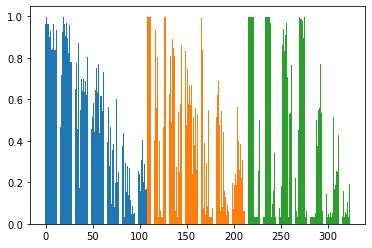

GatedGraphConv
Mean test accuracy (64 hidden channels): 0.517771309912854
> 95% test accuracy (64 hidden channels): 30
Mean test accuracy (128 hidden channels): 0.5179959831154685
> 95% test accuracy (128 hidden channels): 30


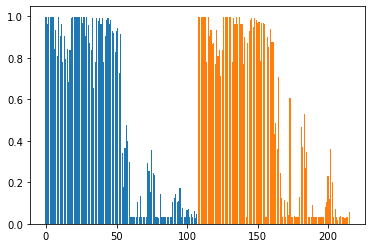

GCN
Mean test accuracy (16 hidden channels): 0.563719816630356
> 95% test accuracy (16 hidden channels): 3
Mean test accuracy (64 hidden channels): 0.4764115831517792
> 95% test accuracy (64 hidden channels): 7
Mean test accuracy (128 hidden channels): 0.3466429511619462
> 95% test accuracy (128 hidden channels): 11


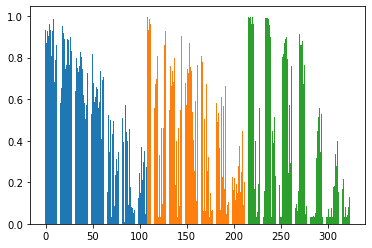

MLP
Mean test accuracy (16 hidden channels): 0.2707255355846042
> 95% test accuracy (16 hidden channels): 2
Mean test accuracy (64 hidden channels): 0.216757443718228
> 95% test accuracy (64 hidden channels): 12
Mean test accuracy (128 hidden channels): 0.1959377269426289
> 95% test accuracy (128 hidden channels): 18


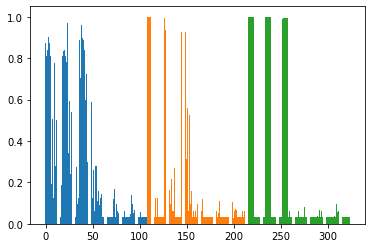

CNN
Mean test accuracy (16 hidden channels): 0.5488068491285402
> 95% test accuracy (16 hidden channels): 24
Mean test accuracy (64 hidden channels): 0.5502433959694989
> 95% test accuracy (64 hidden channels): 36
Mean test accuracy (128 hidden channels): 0.5298474945533769
> 95% test accuracy (128 hidden channels): 36


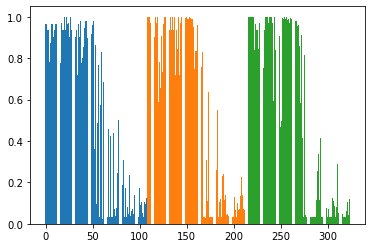

GRU
Mean test accuracy (16 hidden channels): 0.8755560094408134
> 95% test accuracy (16 hidden channels): 42
Mean test accuracy (64 hidden channels): 0.7856050290486566
> 95% test accuracy (64 hidden channels): 46
Mean test accuracy (128 hidden channels): 0.6202846995279593
> 95% test accuracy (128 hidden channels): 38


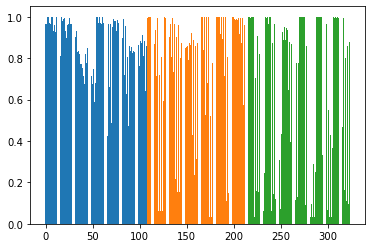

In [47]:
hidden_channels = [16, 64 ,128]
for model_name in models:
    print(model_name)
    idx = 0 
    for hc in hidden_channels:
    
        hc_results = results[(results["model"] == model_name) & (results["hidden_channels"] == hc)]
        hc_results_acc = hc_results.test_acc.to_numpy()
        if len(hc_results_acc) != 0:
            print(f'Mean test accuracy ({hc} hidden channels): {hc_results_acc.mean()}')  
            print(f'> 95% test accuracy ({hc} hidden channels): {(hc_results_acc > 0.95).sum()}') 
            plt.bar(np.arange(idx,idx+len(hc_results_acc)), hc_results_acc)
            idx += len(hc_results_acc)
    plt.show()

#     psd_results = results[(results["model"] == model_name) & (results["eeg_feature"] == 'psd') & (results["number_test_targets"] == 34)]
#     psd_results_acc = psd_results.test_acc.to_numpy()
    
      
#     print(f'Mean test accuracy (WE): {wav_results_acc.mean()}')   
#     print(f'Mean test accuracy (PSD): {psd_results_acc.mean()}')   
#     print(f'Max test accuracy (Overall): {model_results_acc.max()}')    
#     print(f'Max test accuracy (WE): {wav_results_acc.max()}')   
#     print(f'Max test accuracy (PSD): {psd_results_acc.max()}')   
    
    
    
#     
#     plt.bar(np.arange(len(psd_results_acc), 2* len(psd_results_acc)), psd_results_acc)
#     plt.show()
    
#     print(stats.ttest_ind(wav_results_acc,psd_results_acc))

In [21]:
results

,model,eeg_feature,number_test_targets,batch_size,hidden_channels,learning_rate,dropout_rate,mean_test_loss,test_acc,test_f1,test_prec,test_reca,test_roc,pytorch_total_params
0,GraphConv,wav,10,4,16,0.0001,0.0,2.552126,0.965625,0.965625,0.965625,0.965625,0.998306,9005
1,GraphConv,wav,10,16,16,0.0001,0.0,2.522591,0.996875,0.996875,0.996875,0.996875,0.999990,9005
2,GraphConv,wav,10,4,16,0.0001,0.2,2.552032,0.965625,0.965625,0.965625,0.965625,0.999486,9005
3,GraphConv,wav,10,16,16,0.0001,0.2,2.551805,0.965625,0.965625,0.965625,0.965625,0.999980,9005
4,GraphConv,wav,10,4,16,0.0001,0.4,2.613653,0.903125,0.903125,0.903125,0.903125,0.987097,9005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,GRU,psd,34,16,128,0.0090,0.0,2.726481,0.799632,0.799632,0.799632,0.799632,0.986741,892576
968,GRU,psd,34,4,128,0.0090,0.2,3.386927,0.111213,0.111213,0.111213,0.111213,0.695825,892576
969,GRU,psd,34,16,128,0.0090,0.2,2.664758,0.858456,0.858456,0.858456,0.858456,0.992802,892576
970,GRU,psd,34,4,128,0.0090,0.4,3.440629,0.097426,0.097426,0.097426,0.097426,0.607034,892576


In [32]:
f1 = open("participant_classification/test_1_log.txt", "r")
f2 = open("participant_classification/test_2_log.txt", "r")
f3 = open("participant_classification/test_3_log.txt", "r")

lines = f1.readlines()
lines2 = f2.readlines()
lines3 = f3.readlines()

lines.extend(lines2)
lines.extend(lines3)

next_is_log = False
times = {}
for line in lines:
#     print(line)
    if next_is_log:
        next_is_log = False
        time = float(line.split('Training time (s): ')[1].split('n')[0][:-1])
#         print(time)
        if model in times.keys():
            times[model].append(time)
        else:
            times[model] = [time]
    elif "-hc 64" in line or "-hc 128" in line:
        model = line.split('-m ')[1].split(' ')[0]
#         print(model)
        next_is_log = True

In [33]:
for key in times.keys():
    a = times[key]
    a = np.array(a)
    print(key, f'{a.mean():.2f}')

MLP 23.82
GCNMLP 39.96
GatedGraphConvMLP 41.23
CNN 40.26
GCNCNN 82.97
GatedGraphConvCNN 40.05
GRU 96.14
GCNGRU 150.15
GatedGraphConvGRU 99.73


In [114]:
f1 = open("test1_log.txt", "r")
f2 = open("test2_log.txt", "r")

lines = f1.readlines()
lines2 = f2.readlines()

lines.extend(lines2)

next_is_log = False
epochs = {}
for line in lines:
#     print(line)
    if next_is_log:
        next_is_log = False
        time = int(line.split('Total epochs: ')[1].split(' ')[0])
#         time = 1
        print(time)
        if model in epochs.keys():
            epochs[model].append(time)
        else:
            epochs[model] = [time]
    elif "-hc 64" in line or "-hc 128" in line:
        model = line.split('-m ')[1].split(' ')[0]
#         print(model)
        next_is_log = True

161
426
92
186
98
183
38
54
32
45
53
49
31
35
35
31
31
34
67
174
65
112
99
102
31
31
31
31
31
37
31
31
31
31
31
31
217
470
214
381
264
666
69
167
71
72
117
62
36
41
31
45
42
45
155
257
168
237
134
167
31
48
39
59
31
53
31
32
31
31
31
32
1719
2869
1629
872
736
966
63
194
80
79
105
153
42
99
48
82
42
105
1433
1851
160
1424
622
221
31
98
40
93
59
117
31
31
35
33
31
82
222
329
220
265
158
255
31
101
35
69
31
77
31
36
31
32
31
34
125
234
113
371
239
277
31
31
31
31
31
31
31
31
31
31
31
31
86
196
123
455
397
283
32
118
32
110
35
35
32
31
32
79
33
39
511
220
230
169
235
244
31
35
31
34
33
51
31
33
31
41
31
34
258
237
261
237
222
272
170
222
161
81
47
162
32
49
38
88
37
62
1954
4468
73
157
152
234
39
83
36
31
31
71
31
37
31
42
31
46
95
153
103
107
119
134
34
57
33
64
36
77
33
33
65
56
33
41
71
127
60
109
64
99
54
59
64
50
32
59
32
42
37
37
31
51
312
364
223
268
141
289
360
75
64
101
66
123
114
36
47
80
81
49
146
284
149
247
126
324
51
71
56
76
36
43
38
64
48
38
31
53
461
2882
670
1586
394
1003

In [115]:
for key in epochs.keys():
    a = epochs[key]
    a = np.array(a)
    print(key, f'{a.mean():.1f}')

GraphConv 192.3
GatedGraphConv 143.7
GCN 180.0
MLP 70.3
CNN 191.5
GRU 193.8


GraphConv
Mean test accuracy (0.0001 learning rate): 0.7009412445533769
> 95% test accuracy (0.0001 learning rate): 42
Mean test accuracy (0.0045 learning rate): 0.43006819625998544
> 95% test accuracy (0.0045 learning rate): 2
Mean test accuracy (0.009 learning rate): 0.2331183051924473
> 95% test accuracy (0.009 learning rate): 1


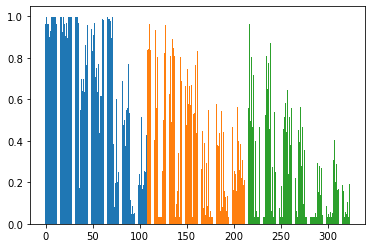

GatedGraphConv
Mean test accuracy (0.0001 learning rate): 0.6303274782135077
> 95% test accuracy (0.0001 learning rate): 34
Mean test accuracy (0.0045 learning rate): 0.5005701933551197
> 95% test accuracy (0.0045 learning rate): 22
Mean test accuracy (0.009 learning rate): 0.4227532679738562
> 95% test accuracy (0.009 learning rate): 4


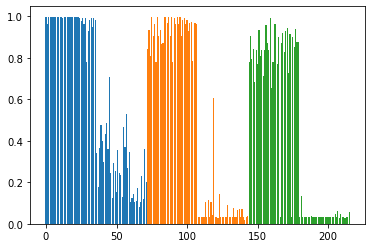

GCN
Mean test accuracy (0.0001 learning rate): 0.6655007489106756
> 95% test accuracy (0.0001 learning rate): 20
Mean test accuracy (0.0045 learning rate): 0.4538115014524329
> 95% test accuracy (0.0045 learning rate): 1
Mean test accuracy (0.009 learning rate): 0.2674621005809731
> 95% test accuracy (0.009 learning rate): 0


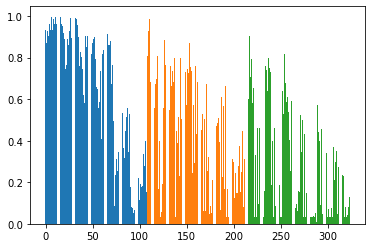

MLP
Mean test accuracy (0.0001 learning rate): 0.50526279956427
> 95% test accuracy (0.0001 learning rate): 32
Mean test accuracy (0.0045 learning rate): 0.12181826434277415
> 95% test accuracy (0.0045 learning rate): 0
Mean test accuracy (0.009 learning rate): 0.056339642338416845
> 95% test accuracy (0.009 learning rate): 0


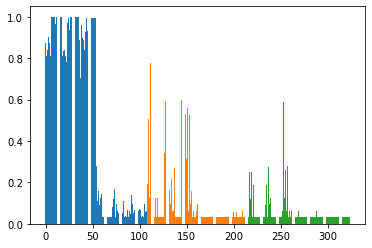

CNN
Mean test accuracy (0.0001 learning rate): 0.6254550199709512
> 95% test accuracy (0.0001 learning rate): 42
Mean test accuracy (0.0045 learning rate): 0.5464301924473494
> 95% test accuracy (0.0045 learning rate): 33
Mean test accuracy (0.009 learning rate): 0.4570125272331154
> 95% test accuracy (0.009 learning rate): 21


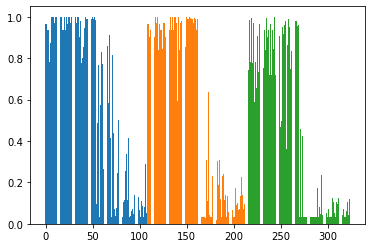

GRU
Mean test accuracy (0.0001 learning rate): 0.9580723493100946
> 95% test accuracy (0.0001 learning rate): 81
Mean test accuracy (0.0045 learning rate): 0.7983297022512709
> 95% test accuracy (0.0045 learning rate): 37
Mean test accuracy (0.009 learning rate): 0.5250436864560638
> 95% test accuracy (0.009 learning rate): 8


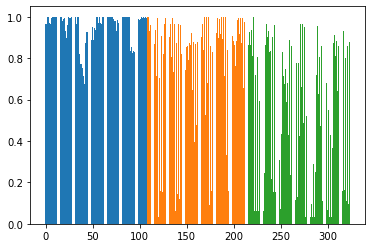

In [118]:
learning_rates = [0.0001, 0.0045, 0.0090]
for model_name in models:
    print(model_name)
    idx = 0 
    for lr in learning_rates:
    
        hc_results = results[(results["model"] == model_name) & (results["learning_rate"] == lr)]
        hc_results_acc = hc_results.test_acc.to_numpy()
        if len(hc_results_acc) != 0:
            print(f'Mean test accuracy ({lr} learning rate): {hc_results_acc.mean()}')  
            print(f'> 95% test accuracy ({lr} learning rate): {(hc_results_acc > 0.95).sum()}') 
            plt.bar(np.arange(idx,idx+len(hc_results_acc)), hc_results_acc)
            idx += len(hc_results_acc)
    plt.show()

GraphConv
Mean test accuracy (4 batch size): 0.4131112321471799
> 95% test accuracy (4 batch size): 24
Mean test accuracy (16 batch size): 0.49630726519002655
> 95% test accuracy (16 batch size): 21


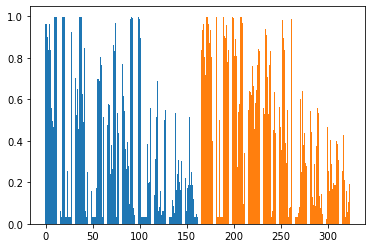

GatedGraphConv
Mean test accuracy (4 batch size): 0.4914981617647059
> 95% test accuracy (4 batch size): 27
Mean test accuracy (16 batch size): 0.5442691312636165
> 95% test accuracy (16 batch size): 33


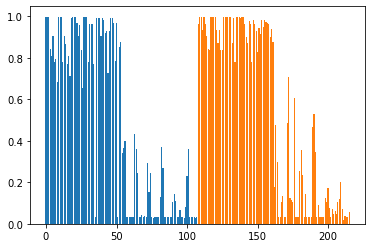

GCN
Mean test accuracy (4 batch size): 0.4209131414911644
> 95% test accuracy (4 batch size): 14
Mean test accuracy (16 batch size): 0.5036030924715565
> 95% test accuracy (16 batch size): 7


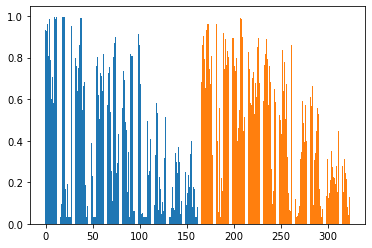

MLP
Mean test accuracy (4 batch size): 0.209795600338901
> 95% test accuracy (4 batch size): 16
Mean test accuracy (16 batch size): 0.24581820382473976
> 95% test accuracy (16 batch size): 16


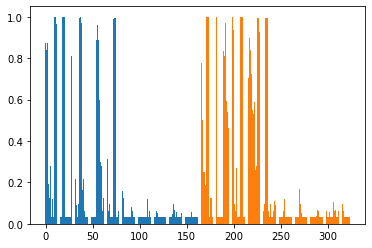

CNN
Mean test accuracy (4 batch size): 0.5183649540062939
> 95% test accuracy (4 batch size): 40
Mean test accuracy (16 batch size): 0.5675668724279835
> 95% test accuracy (16 batch size): 56


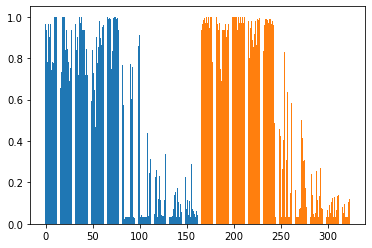

GRU
Mean test accuracy (4 batch size): 0.6496187363834423
> 95% test accuracy (4 batch size): 47
Mean test accuracy (16 batch size): 0.8713450889615106
> 95% test accuracy (16 batch size): 79


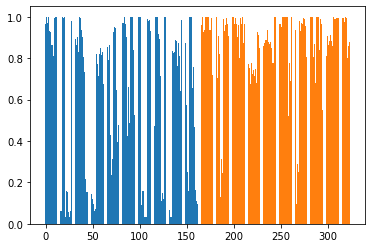

In [119]:
batch_sizes = [4, 16]
for model_name in models:
    print(model_name)
    idx = 0 
    for bs in batch_sizes:
    
        hc_results = results[(results["model"] == model_name) & (results["batch_size"] == bs)]
        hc_results_acc = hc_results.test_acc.to_numpy()
        if len(hc_results_acc) != 0:
            print(f'Mean test accuracy ({bs} batch size): {hc_results_acc.mean()}')  
            print(f'> 95% test accuracy ({bs} batch size): {(hc_results_acc > 0.95).sum()}') 
            plt.bar(np.arange(idx,idx+len(hc_results_acc)), hc_results_acc)
            idx += len(hc_results_acc)
    plt.show()

GraphConv
Mean test accuracy (0 dropout rate): 0.4465016793754539
> 95% test accuracy (0 dropout rate): 17
Mean test accuracy (0.2 dropout rate): 0.45640829248366016
> 95% test accuracy (0.2 dropout rate): 16
Mean test accuracy (0.4 dropout rate): 0.46121777414669574
> 95% test accuracy (0.4 dropout rate): 12


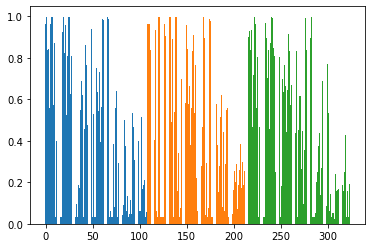

GatedGraphConv
Mean test accuracy (0 dropout rate): 0.5120395901416122
> 95% test accuracy (0 dropout rate): 21
Mean test accuracy (0.2 dropout rate): 0.5358336737472766
> 95% test accuracy (0.2 dropout rate): 21
Mean test accuracy (0.4 dropout rate): 0.5057776756535948
> 95% test accuracy (0.4 dropout rate): 18


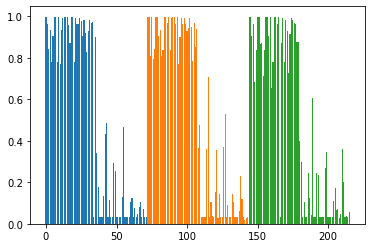

GCN
Mean test accuracy (0 dropout rate): 0.4514076116557734
> 95% test accuracy (0 dropout rate): 6
Mean test accuracy (0.2 dropout rate): 0.4773488562091503
> 95% test accuracy (0.2 dropout rate): 8
Mean test accuracy (0.4 dropout rate): 0.4580178830791577
> 95% test accuracy (0.4 dropout rate): 7


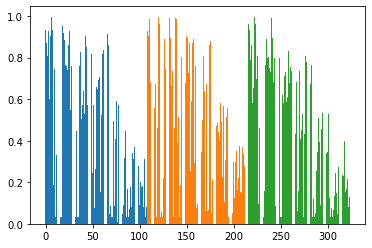

MLP
Mean test accuracy (0 dropout rate): 0.23441074346405225
> 95% test accuracy (0 dropout rate): 10
Mean test accuracy (0.2 dropout rate): 0.2282129402687001
> 95% test accuracy (0.2 dropout rate): 12
Mean test accuracy (0.4 dropout rate): 0.22079702251270877
> 95% test accuracy (0.4 dropout rate): 10


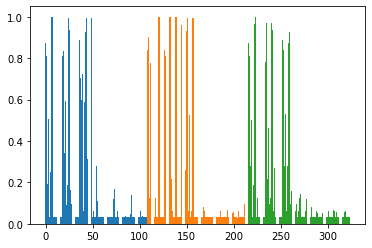

CNN
Mean test accuracy (0 dropout rate): 0.545235906862745
> 95% test accuracy (0 dropout rate): 36
Mean test accuracy (0.2 dropout rate): 0.5413852578068264
> 95% test accuracy (0.2 dropout rate): 27
Mean test accuracy (0.4 dropout rate): 0.5422765749818446
> 95% test accuracy (0.4 dropout rate): 33


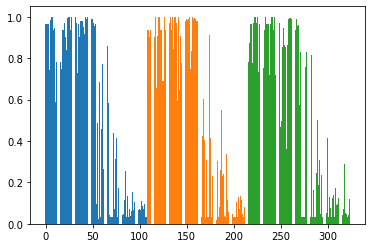

GRU
Mean test accuracy (0 dropout rate): 0.7711555918663761
> 95% test accuracy (0 dropout rate): 45
Mean test accuracy (0.2 dropout rate): 0.7667784359114016
> 95% test accuracy (0.2 dropout rate): 43
Mean test accuracy (0.4 dropout rate): 0.7435117102396513
> 95% test accuracy (0.4 dropout rate): 38


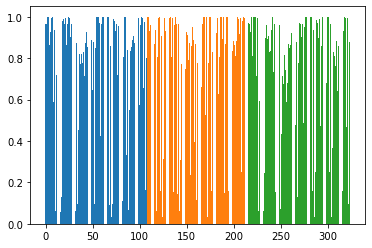

In [122]:
batch_sizes = [0, 0.2, 0.4]
for model_name in models:
    print(model_name)
    idx = 0 
    for bs in batch_sizes:
    
        hc_results = results[(results["model"] == model_name) & (results["dropout_rate"] == bs)]
        hc_results_acc = hc_results.test_acc.to_numpy()
        if len(hc_results_acc) != 0:
            print(f'Mean test accuracy ({bs} dropout rate): {hc_results_acc.mean()}')  
            print(f'> 95% test accuracy ({bs} dropout rate): {(hc_results_acc > 0.95).sum()}') 
            plt.bar(np.arange(idx,idx+len(hc_results_acc)), hc_results_acc)
            idx += len(hc_results_acc)
    plt.show()